In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import glob

In [2]:
# quitar nan

def NanOff(df):
    new = pd.DataFrame(df)
    new = new.replace(np.nan,'0')
    return new

In [3]:
DFrameArray = []
FileNames = []

def OneDataFrame():
    
    for f in glob.glob('Databases/*.xls'):
        df = pd.read_excel(f,sheet_name='hoja1')
        df = NanOff(df) # TAKE OUT THE NAN ENTRIES
        
        DFrameArray.append(df)
        FileNames.append(f)
        
    dft = pd.concat(DFrameArray,ignore_index='True')
    
    return dft

In [4]:
# each element in DFrameArray is a dataframe for each section

# dft contains all the information of the group
dft = OneDataFrame()

In [5]:
print(FileNames)

['Databases/202110_39422_Lista de clase.xls', 'Databases/202110_39380_Lista de clase.xls', 'Databases/202110_10468_Lista de clase.xls', 'Databases/202110_39384_Lista de clase.xls']


In [6]:
# Uso de filtros por columna
#DFrameArray[0].filter(items=['ID','A1','A2'])
DFrameArray[2].filter(like='Nota',axis=1)


# Seleccion por filar
#DFrameArray[2].set_index('A1')

#print(DFrameArray[2].loc[0:3])
#print(DFrameArray[2].iloc[:,0:2])

,Nota1,Nota2
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [7]:
# Agregar columna

Sum = 0

for i in range(1,3):
    Sum += DFrameArray[2]['A'+str(i)]

dtest = DFrameArray[2].assign(NotaFinal=Sum.values)
print(dtest)

                             Nombre         ID Nota1   A1 B1 C1 D1 E1 F1  \
0    GALVIS CORREA, ANDRES FERNANDO  201632930     0  0.5  0  0  0  0  0   
1          GOMEZ TOSCANO, ANA MARIA  202021204     0  0.7  0  0  0  0  0   
2       IBARRA MUÑOZ, DAVID OCTAVIO  202014446     0  0.3  0  0  0  0  0   
3  LEYTON LOPEZ, FERNANDA VALENTINA  202111884     0  1.0  0  0  0  0  0   
4       LOPEZ MENDOZA, PEDRO ARTURO  202025042     0  0.8  0  0  0  0  0   
5     MORENO SUAREZ, DORIS NATHALIA  201820035     0  0.3  0  0  0  0  0   
6      SANCHEZ PAZOS, CAMILO ANDRES  202113026     0  0.2  0  0  0  0  0   
7      VANEGAS ESCOBAR, JUAN FELIPE  202113279     0  0.7  0  0  0  0  0   
8           VERA ANAYA, MARIA PAULA  202113340     0  0.6  0  0  0  0  0   
9      ZAMORA CORTES, DAVID ERNESTO  202113407     0  0.9  0  0  0  0  0   

  Nota2   A2 B2 C2 D2 E2 F2  NotaFinal  
0     0  0.5  0  0  0  0  0        1.0  
1     0  0.4  0  0  0  0  0        1.1  
2     0  0.9  0  0  0  0  0        1.2  

In [8]:
# Mirar posicion
print(dtest.iat[0,1])
# Cambiar posicion
##dtest.iat[0,1] = 3.
#print(dtest)


# Agregar columna o fila 
#dtest.loc['Suma x columna'] = dtest.sum(axis=0)
#dtest.loc[:,'Suma x Renglon'] = dtest.sum(axis=1)
#print(dtest)

201632930


In [9]:
#Select the information by columns
for i in range(1,3):
    print(DFrameArray[2]['A'+str(i)])

0    0.5
1    0.7
2    0.3
3    1.0
4    0.8
5    0.3
6    0.2
7    0.7
8    0.6
9    0.9
Name: A1, dtype: float64
0    0.5
1    0.4
2    0.9
3    0.5
4    0.1
5    0.6
6    0.8
7    0.7
8    0.9
9    1.0
Name: A2, dtype: float64


In [10]:
# Vamos a hacer corte

print(DFrameArray[2][DFrameArray[2]['A1']<0.7])
A1 = DFrameArray[2]['A1']
A1 = np.array(A1)
print(A1)

                           Nombre         ID Nota1   A1 B1 C1 D1 E1 F1 Nota2  \
0  GALVIS CORREA, ANDRES FERNANDO  201632930     0  0.5  0  0  0  0  0     0   
2     IBARRA MUÑOZ, DAVID OCTAVIO  202014446     0  0.3  0  0  0  0  0     0   
5   MORENO SUAREZ, DORIS NATHALIA  201820035     0  0.3  0  0  0  0  0     0   
6    SANCHEZ PAZOS, CAMILO ANDRES  202113026     0  0.2  0  0  0  0  0     0   
8         VERA ANAYA, MARIA PAULA  202113340     0  0.6  0  0  0  0  0     0   

    A2 B2 C2 D2 E2 F2  
0  0.5  0  0  0  0  0  
2  0.9  0  0  0  0  0  
5  0.6  0  0  0  0  0  
6  0.8  0  0  0  0  0  
8  0.9  0  0  0  0  0  
[0.5 0.7 0.3 1.  0.8 0.3 0.2 0.7 0.6 0.9]


0.3    2
0.7    2
0.2    1
0.9    1
0.6    1
0.8    1
1.0    1
0.5    1
Name: A1, dtype: int64


<IPython.core.display.Javascript object>


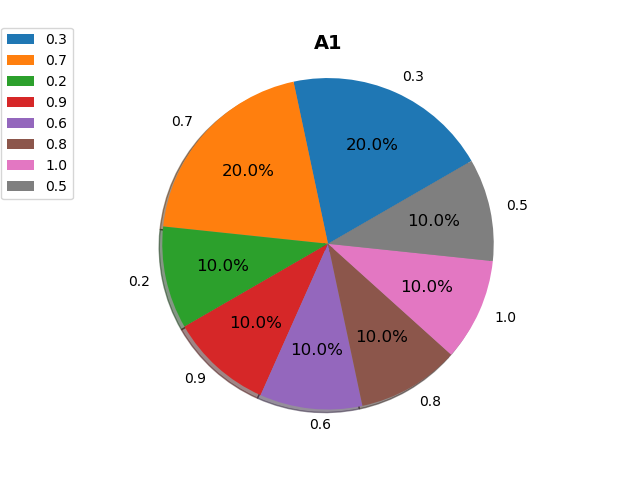

In [11]:
# Plotting pies


sizes = DFrameArray[2]['A1'].value_counts()
print(sizes)
pie = DFrameArray[2]['A1'].value_counts().plot(kind='pie', shadow=True,\
                                              autopct='%1.1f%%', startangle=30,\
                                              radius=1.5,center=(0.5,0.5),\
                                              textprops={'fontsize':12},frame=False,\
                                              pctdistance=0.65)
pie.set_ylabel('')
pie.set_xlabel('')


labels=sizes.index.unique()
plt.gca().axis('equal')
plt.title(DFrameArray[2].columns[3], weight='bold',size=14)
plt.legend(labels, bbox_to_anchor=(0.,1.1))


plt.savefig('Figures/A1.pdf',dpi=100,bbox_inches='tight')


<IPython.core.display.Javascript object>


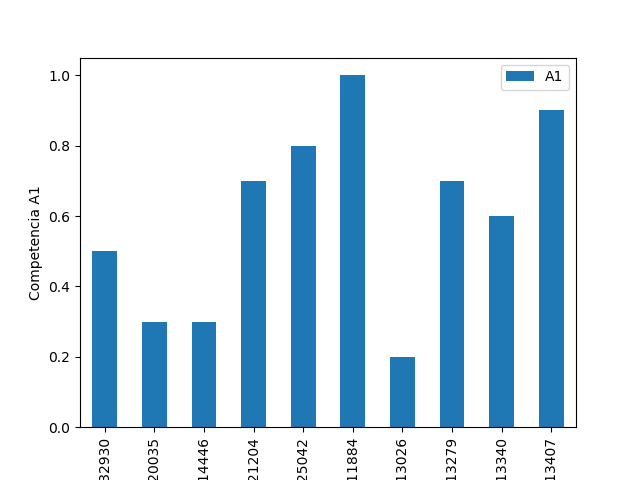

In [12]:
# plotting using group by

fig = plt.figure()

DFrameArray[2].groupby('ID')['A1'].sum().plot(kind='bar',legend='Reverse')
plt.xlabel('ID')
plt.ylabel('Competencia A1')
plt.savefig('Figures/A1Bars.pdf',dpi=100,bbox_inches='tight')

<IPython.core.display.Javascript object>


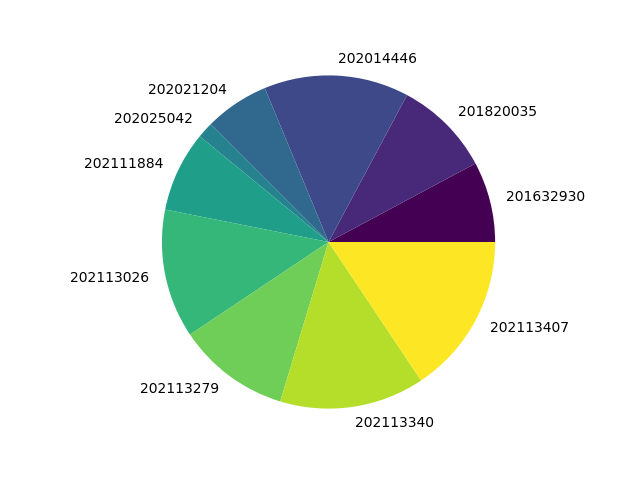

In [13]:
fig = plt.figure()

DFrameArray[2].A2.groupby(DFrameArray[2].ID).sum().plot(kind='pie',cmap='viridis')
plt.axis('equal')
plt.ylabel('')
plt.savefig('Figures/A1Pie.pdf',dpi=100,bbox_inches='tight')

<IPython.core.display.Javascript object>


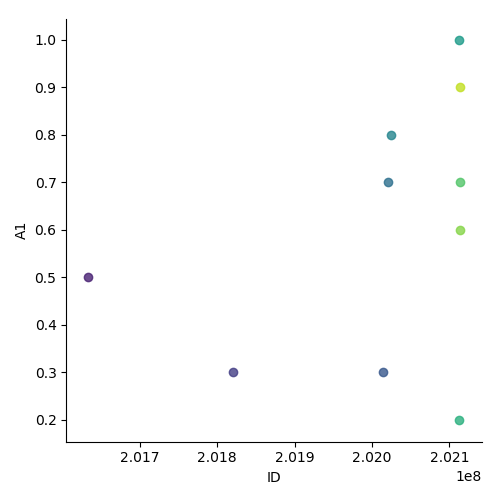

In [14]:
#fig = plt.figure()
sns.lmplot(x='ID',y='A1',data=DFrameArray[2],fit_reg=False,hue='ID',legend=False,palette='viridis')
#plt.savefig('Figures/A1seaborn.pdf',dpi=100,bbox_inches='tight')

In [15]:
#sns.set(style='ticks', color_codes=True)
#g = sns.pairplot(DFrameArray[2], hue='ID', palette='Spectral')

In [16]:
print(dft['A2'])

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
     ... 
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41    0.5
42    0.4
43    0.9
44    0.5
45    0.1
46    0.6
47    0.8
48    0.7
49    0.9
50      1
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
Name: A2, Length: 61, dtype: object


In [17]:
# Write the whole dataframe in an excel file


output = pd.ExcelWriter('DataBaseFisicaI.xls')
dft.to_excel(output,'Hoja1')
output.save()